<a href="https://colab.research.google.com/github/Piranavan25/ml-portfolio/blob/main/mnist-digit-classifier/mnistdata_digit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:

 #load the data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


In [ ]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Flatten 28x28 → 784
X_train_flat = X_train.reshape(len(X_train), 784)
X_test_flat = X_test.reshape(len(X_test), 784)

In [ ]:
#Build the model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train the model
history = model.fit(
    X_train_flat, y_train,
    validation_split=0.1,
    epochs=5,
    batch_size=32
)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8720 - loss: 0.4450 - val_accuracy: 0.9652 - val_loss: 0.1134
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9671 - loss: 0.1124 - val_accuracy: 0.9733 - val_loss: 0.0899
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9776 - loss: 0.0738 - val_accuracy: 0.9787 - val_loss: 0.0731
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9818 - loss: 0.0559 - val_accuracy: 0.9785 - val_loss: 0.0734
Epoch 5/5
 628/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9882 - loss: 0.0374

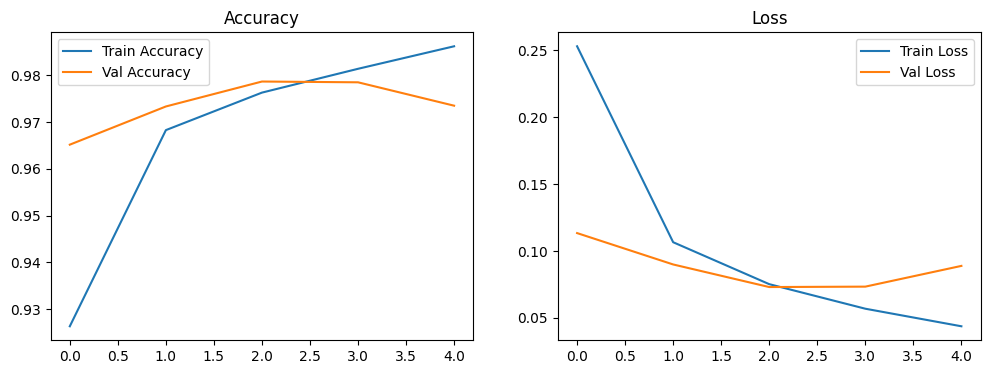

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test_flat, y_test)
print("\nTest Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9685 - loss: 0.1066

Test Accuracy: 0.9724000096321106


In [ ]:
y_pred = model.predict(X_test_flat)
y_pred_labels = [np.argmax(i) for i in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


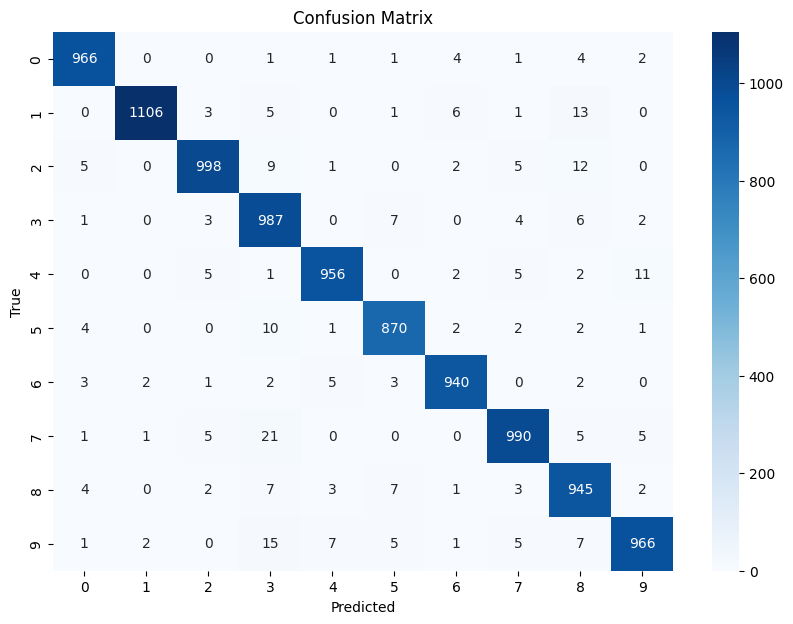

In [ ]:
y_pred = model.predict(X_test_flat)
y_pred_labels = [np.argmax(i) for i in y_pred]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

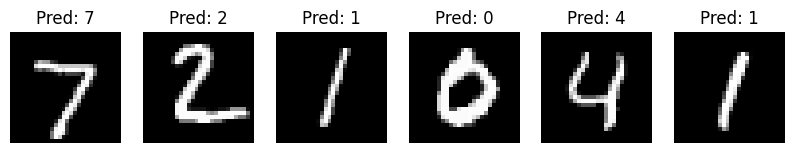

In [ ]:
plt.figure(figsize=(10, 3))

for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Pred: {y_pred_labels[i]}")
    plt.axis('off')

plt.show()

In [ ]:
model.save("mnist_model.keras")
print("Model saved successfully.")

Model saved successfully.
